### Import Packages



In [40]:
import pandas as pd

### Data Overview



Data source: [https://www.kaggle.com/datasets/debajyotipodder/co2\-emission\-by\-vehicles?resource=download](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?resource=download)

Model

4WD/4X4 = Four\-wheel drive

AWD = All\-wheel drive

FFV = Flexible\-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase

Transmission

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 \- 10 = Number of gears

Fuel type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol \(E85\)

N = Natural gas



In [41]:
# Load dataset hint: pd.read_csv()
data=pd.read_csv('CO2 Emissions_Canada.csv')

In [0]:
# use .head() .info() and similar functions to get an overview of the data

In [0]:
data.head()

In [0]:
data.tail()

In [0]:
data.describe()

In [0]:
# Check null values

In [0]:
data.isnull().sum()

### Exploratory Data Analysis

In [0]:
# create plots for your data to understand the trend of data :D

In [0]:
import plotly.express as px
import pandas as pd

from matplotlib import pyplot as plt


In [0]:
numerical_data = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
fig = px.scatter_matrix(numerical_data)
fig.show()


In [0]:
numerical_data = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
#fig = px.scatter_matrix(numerical_data)
#fig = pd.plotting.scatter_matrix(numerical_data, figsize=(10, 10))
#fig.show()
'''
scatter_matrix = pd.plotting.scatter_matrix(
    numerical_data,
    figsize  = [15, 15],
    marker   = ".",
    s        = 0.2,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)
'''
df = pd.DataFrame(data, columns=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'])
axes = pd.plotting.scatter_matrix(df, alpha=0.5, figsize  = [20, 20])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.label.set_fontsize(15)
    ax.yaxis.label.set_fontsize(15)
    ax.yaxis.label.set_ha('right')


plt.gcf().subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [0]:
#Scatter plots but I noticed some sort of regresstion with these few variables which remain consistent
fig1=px.scatter(data, x="Fuel Consumption City (L/100 km)", y="Fuel Consumption Comb (mpg)", color='Make', title="its a regresstion")
fig1

In [0]:
fig2=px.scatter(data, x="Fuel Consumption Hwy (L/100 km)", y="Fuel Consumption Comb (mpg)", color='Make', title="FCH FCC")
fig2

In [0]:
fig3=px.scatter(data, x="Fuel Consumption Comb (L/100 km)", y="Fuel Consumption Comb (mpg)", color='Make', title="cool grsph 3")
fig3

In [0]:
#for some reason, higher co2 emmissions mean less fuel consumption
fig4=px.scatter(data, x="CO2 Emissions(g/km)", y="Fuel Consumption Comb (mpg)", color='Make', title="if i could name this i would name it...")
fig4

### Data Cleaning

In [0]:
# handle missing data or convert categorical data into dummy variables

In [0]:
car_names=['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI']


In [0]:
data2=data[data['Make'] == 'ACURA']
data2.head()

In [0]:
#support vector regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

#n_samples, n_features = 10, 5
#rng = np.random.RandomState(0)
#y = rng.randn(n_samples)
#X = rng.randn(n_samples, n_features)
input_columns=['Fuel Consumption City (L/100 km)']
target=['CO2 Emissions(g)']
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])


In [0]:
input_columns=['Fuel Consumption City (L/100 km)']
target=['CO2 Emissions(g)']
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

SVR.fit(x_train, y_train)

In [22]:

#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
model=SVR()
input_columns = df.loc[:, df.columns != "CO2 Emissions(g/km)"]
target = df["CO2 Emissions(g/km)"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(input_columns, target, test_size=0.2)
model.fit(x_train1, y_train1)



NameError: name 'df' is not defined

In [0]:
y_hat=model.predict(x_test1)

In [0]:
model.score(x_test1, y_test1)

In [0]:
total_squared_error = (np.sum((y_test1 - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test1) #divide this by how many rows/observations we have 
print(mean_squared_error)

In [0]:
min=data.loc[data["CO2 Emissions(g/km)"]].min(axis=0)
print(min)

In [0]:
488

In [42]:
#import packages
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
#Set up Data by splitting to Train:Test = 80:20 
model=SVR()
input_columns = data.loc[:, data.columns != "CO2 Emissions(g/km)"]
target = data["CO2 Emissions(g/km)"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(input_columns, target, test_size=0.2)

In [0]:
#Import packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

#SVR parameters
kernel = ["linear", "rbf", "sigmoid", "poly"]
tolerance = [1e-3, 1e-4, 1e-5, 1e-6]
C = [1, 1.5, 2, 2.5, 3]
grid = dict(kernel=kernel, tol=tolerance, C=C)
MODEL=SVR()
# parameter saved in a dictionary
'''PARAMETER = {'kernel' : ["linear", "rbf", "sigmoid", "poly"],
             'tolerance': [1e-3, 1e-4, 1e-5, 1e-6],
             'C': [1, 1.5, 2, 2.5, 3]}'''
# implement grid search cv
#cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#gs_SVR = GridSearchCV(estimator=MODEL, param_grid=grid, n_jobs=-1, cv=cvFold, scoring="neg_mean_squared_error")
gs_SVR = GridSearchCV(MODEL, grid)
# fit the models
gs_res = gs_SVR.fit(x_train1, y_train1)
# print out the best parameters
print(gs_res.best_params_)

In [49]:
#import packages
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
#Set up Data by splitting to Train:Test = 80:20 
model=SVR() # C=3, kernel= 'rbf' (default), tol= 1e-06
input_columns = data.loc[:, data.columns != "CO2 Emissions(g/km)"]
target = data["CO2 Emissions(g/km)"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(input_columns, target, test_size=0.2)

In [50]:
#Fit Model
model.fit(x_train1, y_train1)
#predict
y_hat1=model.predict(x_test1)
#Score
model.score(x_test1, y_test1)

ValueError: could not convert string to float: 'CHEVROLET'

In [0]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train1, y_train1)

In [45]:
y_hat=regr.predict(x_test1)

ValueError: could not convert string to float: 'MAZDA'

In [45]:
regr.score(x_test1, y_test1)

0.8794670754409435

In [44]:

total_squared_error = (np.sum((y_test1 - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test1) #divide this by how many rows/observations we have 
print(mean_squared_error)


413.40621836106357


In [19]:
#import packages
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
#Set up Data by splitting to Train:Test = 80:20 
#model=SVR(C=3, kernel= 'rbf', tol= 1e-06)
input_columns = data.loc[:, data.columns != "CO2 Emissions(g/km)"]
target = data["CO2 Emissions(g/km)"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(input_columns, target, test_size=0.2)

In [21]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(C=3, kernel= 'rbf', tol= 1e-06))
regr.fit(x_train1, y_train1)
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svr', SVR(epsilon=0.2))])

ValueError: could not convert string to float: 'JEEP'

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y_test1,y_hat, s=0.1, c='red')
plt.xlabel('CO2 emission', fontsize = 20)
plt.ylabel('Estimate', fontsize = 20)
plt.grid('on')
plt.plot([100,800], [100,800])
plt.show()

NameError: name 'y_hat' is not defined

In [78]:
import pandas as pd
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt

In [79]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [80]:
#Ameya
#Replaces X,Y,Z,D,N with Gasoline types
df.replace(to_replace= 'Z', value= 'Premium gasoline', inplace = True)
df.replace(to_replace= 'X', value= 'Gasoline' , inplace= True)
df.replace(to_replace= 'D', value= 'Diesel' , inplace= True)
df.replace(to_replace= 'E', value= 'Ethanol' , inplace= True)
df.replace(to_replace= 'N', value= 'Natural gas' , inplace= True)

In [81]:
from sklearn.model_selection import train_test_split
col_category = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for col in col_category:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_')], axis=1)
# define the input_columns and target variables
input_columns = df.loc[:, df.columns != "CO2 Emissions(g/km)"]
target = target = df["CO2 Emissions(g/km)"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [95]:
#import packages
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
#Set up Data by splitting to Train:Test = 80:20 
model=SVR(C=3, kernel= 'rbf', tol= 1e-06)
input_columns = df.loc[:, df.columns != "CO2 Emissions(g/km)"]
target = df["CO2 Emissions(g/km)"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(input_columns, target, test_size=0.2)

In [96]:
#Fit Model
model.fit(x_train1, y_train1)
#predict
y_hat1=model.predict(x_test1)
#Score
model.score(x_test1, y_test1)

0.8856566796361368

In [97]:
from sklearn.metrics import mean_squared_error


'''
total_squared_error = (np.sum((y_test1 - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test1) #divide this by how many rows/observations we have 
print(mean_squared_error)

Normalized RMSE = RMSE / (max value – min value)
'''
rmse=mean_squared_error(y_test1, y_hat1, squared=False)
NRMSE=rmse/(max(df['CO2 Emissions(g/km)'])-min(df['CO2 Emissions(g/km)']))
print(NRMSE)

0.047504874766518206


ValueError: x and y must be the same size

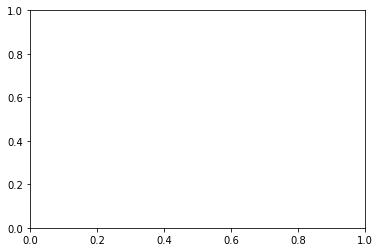

In [98]:
import matplotlib.pyplot as plt
plt.scatter(x_test1, y_test1, s=10, color='green', label='original')
plt.plot(x_test1, y_hat1, lw=2, color='red', label='fitted')
plt.xlabel('CO2 emission', fontsize = 20)
plt.ylabel('Estimate', fontsize = 20)
plt.grid('on')
#plt.plot([100,500], [100,500])
plt.show()
# what variables are you trying to plot?
# since its a scatter plot, you can only have two variables at a time, so the x and y
# you did the matrix scatter plot earlier though, thats plotting multiple varibales at a time
# for the code that you copied, i was trying to see whether our predicted value is linear
# does that answer your question...? :0
#oh yes I forgot about that.

In [0]:
Students should begin to write reflections that: - Describe each visualization - Talk about how each model works - Talk about how each model performs and which hyperparameters exist for each model
normalized rmse
https://docs.google.com/document/d/1QxFANWMabQ9NhxhRMNeJTO9cPpPkJ-majxx5MXxOU3k/edit?usp=sharing

In [0]:
https://docs.google.com/presentation/d/1atWatrS8aQZWNFkMJVJ3ZAJVPjeUSj5epAOAzoDzmpQ/edit?usp=sharing